In [1]:
import os
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm as cm
from functools import reduce

#  Data Cleaning and Pre-processing

## 1. Gender and Age 

In [2]:
# Merging all the years into a single dataframe 

df_pop_reg_2002 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2002')
df_pop_reg_2003 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2003')
df_pop_reg_2004 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2004')
df_pop_reg_2005 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2005')
df_pop_reg_2006 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2006')
df_pop_reg_2007 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2007')
df_pop_reg_2008 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2008')
df_pop_reg_2009 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2009')
df_pop_reg_2010 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2010')
df_pop_reg_2011 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2011')
df_pop_reg_2012 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2012')
df_pop_reg_2013 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2013')
df_pop_reg_2014 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2014')
df_pop_reg_2015 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2015')
df_pop_reg_2016 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2016')
df_pop_reg_2017 = pd.read_excel('estim-pop-nreg-sexe-gca-1975-2020.xls', header=[0,1], sheet_name='2017')

df_pop_reg_2002['year'] = '2002' 
df_pop_reg_2003['year'] = '2003' 
df_pop_reg_2004['year'] = '2004' 
df_pop_reg_2005['year'] = '2005' 
df_pop_reg_2006['year'] = '2006' 
df_pop_reg_2007['year'] = '2007' 
df_pop_reg_2008['year'] = '2008' 
df_pop_reg_2009['year'] = '2009' 
df_pop_reg_2010['year'] = '2010' 
df_pop_reg_2011['year'] = '2011' 
df_pop_reg_2012['year'] = '2012' 
df_pop_reg_2013['year'] = '2013' 
df_pop_reg_2014['year'] = '2014' 
df_pop_reg_2015['year'] = '2015'
df_pop_reg_2016['year'] = '2016'
df_pop_reg_2017['year'] = '2017'

In [3]:
# Concatenation Operation over our sub-dataframes

df_pop_reg = pd.concat([df_pop_reg_2002, df_pop_reg_2003, df_pop_reg_2004, df_pop_reg_2005, df_pop_reg_2006, df_pop_reg_2007, df_pop_reg_2008,
                    df_pop_reg_2009, df_pop_reg_2010, df_pop_reg_2011, df_pop_reg_2012, df_pop_reg_2013, df_pop_reg_2014, df_pop_reg_2015, 
                    df_pop_reg_2016, df_pop_reg_2017], ignore_index=True)

In [4]:
# Sample of our dataframe
df_pop_reg.sample(3)

Régions   Ensemble                                      \
     Unnamed: 0_level_1 0 à 19 ans 20 à 39 ans 40 à 59 ans 60 à 74 ans   
117          La Réunion     278190      227692      200272       63748   
29   Nouvelle-Aquitaine    1223605     1366171     1491328      815383   
105           Grand Est    1354776     1450845     1562624      702098   

                                Hommes                                      \
    75 ans et plus    Total 0 à 19 ans 20 à 39 ans 40 à 59 ans 60 à 74 ans   
117          24205   794107     141874      107793       97687       29243   
29          535258  5431745     626735      682617      733709      380243   
105         436273  5506616     693412      731643      776846      330449   

                                Femmes                                      \
    75 ans et plus    Total 0 à 19 ans 20 à 39 ans 40 à 59 ans 60 à 74 ans   
117           8738   385335     136316      119899      102585       34505   
29          198411  2621715     596870      683554      757619      435140   
105         154360  2686710     661364      719202      785778      371649   

                             year  
    75 ans et plus    Total        
117          15467   408772  2007  
29          336847  2810030  2003  
105         281913  2819906  2007

In [5]:
print('the shape of this resulting dataset is :', df_pop_reg.shape)

the shape of this resulting dataset is : (324, 20)


In [6]:
def process_pop(df):
    tmp = df.copy()
    tmp.columns = tmp.columns.droplevel()
    tmp = tmp.rename(columns={'Unnamed: 0_level_1':'region', '':'year'})
    return tmp

In [7]:
# Splitting by gender in order to get the final dataframe

df_pop_reg_men = df_pop_reg[['Hommes', 'Régions', 'year']]
df_pop_reg_women = df_pop_reg[['Femmes', 'Régions', 'year']]
df_pop_reg_all = df_pop_reg[['Ensemble', 'Régions', 'year']]

df_pop_reg_men = process_pop(df_pop_reg_men)
df_pop_reg_women = process_pop(df_pop_reg_women)
df_pop_reg_all = process_pop(df_pop_reg_all)

df_pop_reg_men['gender'] = 'male'
df_pop_reg_women['gender'] = 'female'

df_pop_reg_joined = pd.concat([df_pop_reg_men, df_pop_reg_women], ignore_index=True )

In [8]:
df_pop_reg_joined.sample(3)

,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total,region,year,gender
595,643641,665758,786220,515394,371257,2982270,Occitanie,2015,female
344,882260,977120,973884,499361,349055,3681680,Auvergne-Rhône-Alpes,2003,female
491,1500287,1790007,1609778,707436,487492,6095000,Île-de-France,2010,female


In [14]:
#df_pop_reg_all.to_csv('all_genders.csv')

In [17]:
#df_pop_reg_men_tmp = df_pop_reg_men.groupby(['gender','year','region'])['Total'].mean()
#df_pop_reg_men_new = pd.DataFrame(df_pop_reg_men_tmp).reset_index()
#df_pop_reg_men_new.rename(columns={'Total':'total_men'}, inplace=True)

#df_pop_reg_women_tmp = df_pop_reg_women.groupby(['gender','year','region'])['Total'].mean()
#df_pop_reg_women_new = pd.DataFrame(df_pop_reg_women_tmp).reset_index()
#df_pop_reg_women_new.rename(columns={'Total':'total_women'}, inplace=True)

#df_pop_reg_men_new.to_csv('study_men.csv')
#df_pop_reg_women_new.to_csv('study_women.csv')

#df_pop_reg_joined.to_csv('gender_study.csv')
#df_pop_reg_joined.region.drop_duplicates().tolist()

In [15]:
print('the shape of this resulting dataset is :', df_pop_reg_joined.shape)

the shape of this resulting dataset is : (648, 9)


In [16]:
df_pop_reg_joined.describe()

,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total
count,6.480000e+02,6.480000e+02,6.480000e+02,6.480000e+02,6.480000e+02,6.480000e+02
mean,1.186460e+06,1.218969e+06,1.286463e+06,6.667148e+05,4.077208e+05,4.766327e+06
std,2.237468e+06,2.316211e+06,2.440964e+06,1.280174e+06,8.144891e+05,9.043864e+06
min,2.957700e+04,2.562700e+04,1.503200e+04,3.401000e+03,9.800000e+02,8.826600e+04
25%,1.403408e+05,1.198950e+05,1.174818e+05,4.502025e+04,2.102975e+04,4.296905e+05
50%,4.260640e+05,4.231305e+05,4.545230e+05,2.556900e+05,1.650350e+05,1.700940e+06
75%,7.056262e+05,7.414350e+05,7.866968e+05,4.474222e+05,2.893625e+05,2.912850e+06
max,8.365745e+06,8.505834e+06,9.044965e+06,5.698211e+06,3.795973e+06,3.447722e+07


In [17]:
#df_pop_reg_joined.to_csv('pop_1.csv')

## 2. Revenue and Taxes

In [18]:
df_rdb_2002 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2002-Déf par hab')
df_rdb_2003 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2003-Déf par hab')
df_rdb_2004 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2004-Déf par hab')
df_rdb_2005 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2005-Déf par hab')
df_rdb_2006 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2006-Déf par hab')
df_rdb_2007 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2007-Déf par hab')
df_rdb_2008 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2008-Déf par hab')
df_rdb_2009 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2009-Déf par hab')
df_rdb_2010 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2010-Déf par hab')
df_rdb_2011 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2011-Def par hab')
df_rdb_2012 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2012-Déf par hab')
df_rdb_2013 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2013-déf par hab')
df_rdb_2014 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2014-déf par hab')
df_rdb_2015 = pd.read_excel('rdb-regions-menages-1994-2015.xls', sheet_name='RDB2015-semidéf par hab')

df_rdb_2002['year'] = '2002' 
df_rdb_2003['year'] = '2003' 
df_rdb_2004['year'] = '2004' 
df_rdb_2005['year'] = '2005' 
df_rdb_2006['year'] = '2006' 
df_rdb_2007['year'] = '2007' 
df_rdb_2008['year'] = '2008' 
df_rdb_2009['year'] = '2009' 
df_rdb_2010['year'] = '2010' 
df_rdb_2011['year'] = '2011' 
df_rdb_2012['year'] = '2012' 
df_rdb_2013['year'] = '2013' 
df_rdb_2014['year'] = '2014' 
df_rdb_2015['year'] = '2015' 

In [19]:
# Concatenating the sub-dataframes

df_rdb = pd.concat([df_rdb_2002, df_rdb_2003, df_rdb_2004, df_rdb_2005, df_rdb_2006, df_rdb_2007, df_rdb_2008, df_rdb_2009, df_rdb_2010,
                   df_rdb_2011, df_rdb_2012, df_rdb_2013, df_rdb_2014, df_rdb_2015], ignore_index=True)

In [20]:
df_rdb.sample(3)

,Régions,Excédent brut et revenu mixte,Salaires et traitements bruts,Cotisations sociales des salariés et des non-salariés,Impôts,Prestations en espèces,Autres (1),Revenu disponible brut,year
300,Bourgogne-Franche-Comté,4461.0,11112.0,1979.0,2754.0,7933.0,1421.0,20194.0,2015
18,Guyane,2511.0,5168.0,464.0,728.0,1630.0,427.0,8544.0,2002
268,DOM,3614.0,8070.0,896.0,890.0,3719.0,502.0,14119.0,2013


In [21]:
print('the shape of this resulting dataset is :', df_rdb.shape)

the shape of this resulting dataset is : (322, 9)


In [22]:
df_rdb.describe()

,Excédent brut et revenu mixte,Salaires et traitements bruts,Cotisations sociales des salariés et des non-salariés,Impôts,Prestations en espèces,Autres (1),Revenu disponible brut
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,3881.740260,9750.704545,1548.412338,2069.500000,5292.422078,1288.522727,16595.477273
std,874.390589,2653.911068,628.461683,955.477763,1813.353760,606.219349,4068.486327
min,864.000000,1916.000000,78.000000,81.000000,98.000000,-40.000000,2713.000000
25%,3515.500000,8421.500000,1318.750000,1340.750000,4353.000000,825.250000,15050.000000
50%,4065.000000,10084.000000,1715.000000,2219.000000,5665.500000,1489.000000,17531.000000
75%,4437.500000,11082.250000,1932.000000,2631.000000,6618.250000,1643.000000,19347.750000
max,5507.000000,18336.000000,3257.000000,5235.000000,7933.000000,2739.000000,24200.000000


# Analysis on Gender/Age

In [23]:
# Gender & Region
tmp_gr = df_pop_reg_joined.groupby(['gender', 'year', 'region'])['Total'].sum()
gr = pd.DataFrame(tmp_gr).reset_index()

In [24]:
tmp_total = df_pop_reg_joined.groupby(['year'])['Total'].sum()
total = pd.DataFrame(tmp_total).reset_index()

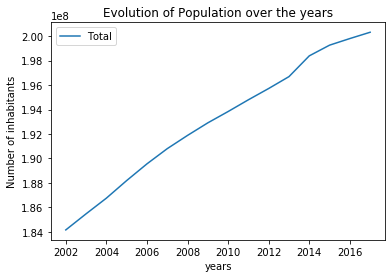

In [25]:
fig = total.plot(x='year', y='Total', kind='line')
plt.rcParams['axes.facecolor'] = 'white'
plt.title('Evolution of Population over the years')
plt.xlabel("years")
plt.ylabel("Number of inhabitants")
plt.show();

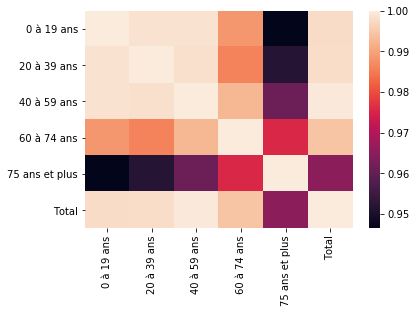

In [26]:
# plot the heatmap on Seaborn
corr = df_pop_reg_joined.corr()
sns.heatmap(corr,
xticklabels=corr.columns,
yticklabels=corr.columns);

# Analysis on Revenue/Taxes

In [27]:
revenue_per_region = df_rdb.groupby(['Régions', 'year'])['Revenu disponible brut'].mean()

In [28]:
rpg = pd.DataFrame(revenue_per_region).reset_index()

In [29]:
rpg_year = rpg.groupby('year').mean().reset_index()
rpg_region = rpg.groupby('Régions').mean().reset_index()

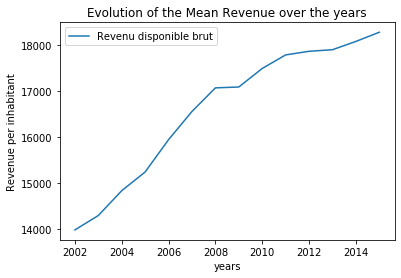

In [30]:
fig = rpg_year.plot(x='year', y='Revenu disponible brut', kind='line')
plt.rcParams['axes.facecolor'] = 'white'
plt.title('Evolution of the Mean Revenue over the years')
plt.xlabel("years")
plt.ylabel("Revenue per inhabitant")
plt.show();

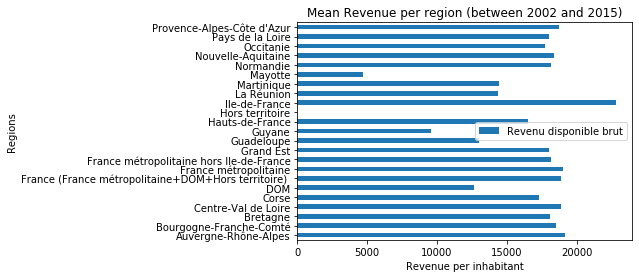

In [31]:
fig = rpg_region.plot(x='Régions', y='Revenu disponible brut', kind='barh')
plt.rcParams['axes.facecolor'] = 'white'
plt.title('Mean Revenue per region (between 2002 and 2015)')
plt.xlabel("Revenue per inhabitant")
plt.ylabel("Regions")
plt.show();

In [32]:
#rpg_region.to_csv('rpg_region.csv')

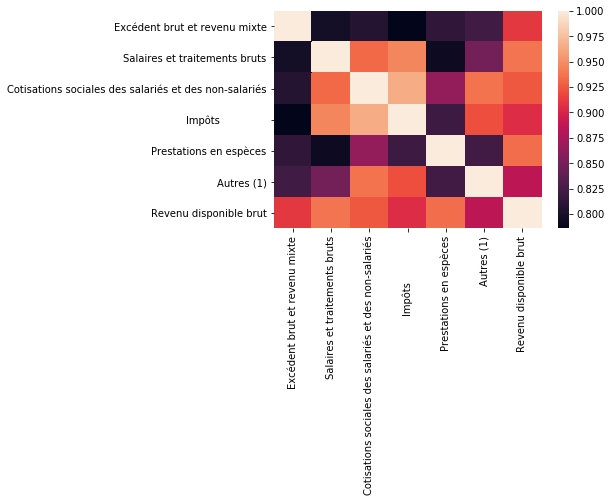

In [33]:
# plot the heatmap on Seaborn
corr = df_rdb.corr()
sns.heatmap(corr,
xticklabels=corr.columns,
yticklabels=corr.columns);

# Data Gathering

### Merging population features

In [34]:
df_rdb = df_rdb.rename(columns={"Régions":"region"})

In [35]:
df_rdb.columns.tolist()

['region',
 'Excédent brut et revenu mixte',
 'Salaires et traitements bruts',
 'Cotisations sociales des salariés et des non-salariés',
 'Impôts               ',
 'Prestations en espèces',
 'Autres (1)',
 'Revenu disponible brut',
 'year']

In [36]:
df_pop_reg_joined.columns.tolist()

['0 à 19 ans',
 '20 à 39 ans',
 '40 à 59 ans',
 '60 à 74 ans',
 '75 ans et plus',
 'Total',
 'region',
 'year',
 'gender']

In [37]:
df_pop_reg_joined.region.drop_duplicates().tolist()

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val-de-Loire',
 'Corse',
 'Grand Est',
 'Hauts-de-France',
 'Île-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'France métropolitaine',
 'Guadeloupe ',
 'Martinique ',
 'Guyane',
 'La Réunion',
 'DOM',
 'France métropolitaine et DOM',
 'Mayotte']

In [38]:
df_rdb.region.drop_duplicates().tolist()

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Corse',
 'Grand Est',
 'Hauts-de-France',
 'Ile-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'France métropolitaine',
 'France métropolitaine hors Ile-de-France',
 'DOM',
 'Guadeloupe',
 'Martinique',
 'Guyane',
 'La Réunion',
 'Mayotte',
 'Hors territoire',
 'France (France métropolitaine+DOM+Hors territoire) ']

In [45]:
df_pop_reg_joined['region'].replace(['Guadeloupe ','Martinique '], ['Guadeloupe','Martinique'], inplace=True)
df_rdb['region'].replace(['Ile-de-France','Centre-Val de Loire'], ['Île-de-France', 'Centre-Val-de-Loire'], inplace=True)

In [48]:
df_rdb_test = df_rdb.copy()
df_rdb_test['region'].replace(['Guadeloupe','Martinique'], ['Guadeloupe ','Martinique '], inplace=True)
df_all_genders = pd.merge(df_rdb_test, df_pop_reg_all, on=['year', 'region'], how='inner')
df_all_genders.drop(columns=['Excédent brut et revenu mixte','Salaires et traitements bruts','Impôts               ',
                             'Prestations en espèces', 'Autres (1)','0 à 19 ans', '20 à 39 ans', '40 à 59 ans', '60 à 74 ans',
                             '75 ans et plus'], inplace=True)
df_all_genders.rename(columns={"Revenu disponible brut":"gross-salary", 
                               "Cotisations sociales des salariés et des non-salariés":"social-contribution"}, inplace=True)
#df_all_genders.to_csv('pop-salary-contribution.csv')

In [34]:
df_inner_pop = pd.merge(df_rdb, df_pop_reg_joined, on=['year', 'region'], how='inner')

In [35]:
df_inner_pop.sample(5)

,region,Excédent brut et revenu mixte,Salaires et traitements bruts,Cotisations sociales des salariés et des non-salariés,Impôts,Prestations en espèces,Autres (1),Revenu disponible brut,year,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total,gender
489,Martinique,4096.0,10215.0,1324.0,1412.0,4088.0,1019.0,16682.0,2014,46508,41997,65998,32286,19620,206409,female
209,Nouvelle-Aquitaine,4709.0,9914.0,1795.0,2216.0,6327.0,1682.0,18621.0,2007,613588,673731,811557,442664,372955,2914495,female
86,Grand Est,3546.0,10186.0,1717.0,2106.0,5336.0,1464.0,16709.0,2004,705080,751778,751632,323543,134037,2666070,male
506,Grand Est,3844.0,12021.0,2067.0,2923.0,7105.0,1358.0,19338.0,2015,671950,672558,757461,418365,190542,2710876,male
174,Pays de la Loire,3998.0,10031.0,1773.0,2132.0,5882.0,1526.0,17532.0,2006,453665,449748,466184,202806,108182,1680585,male


### Merging population and Election

In [36]:
df_election = pd.read_csv('Election_gathering_region.csv', delimiter=";", encoding='latin-1')
df_election = df_election.rename(columns={"Region":"region"})

In [37]:
df_election.region.tolist()

['Grand Est',
 'Nouvelle-Aquitaine',
 'Auvergne et Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Île-de-France',
 'Occitanie',
 'Hauts-de-France',
 'Normandie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Corse',
 'Guadeloupe',
 'Martinique',
 'Guyane',
 'La Réunion',
 'Mayotte']

In [38]:
df_inner_pop.region.drop_duplicates().tolist()

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val-de-Loire',
 'Corse',
 'Grand Est',
 'Hauts-de-France',
 'Île-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'France métropolitaine',
 'DOM',
 'Guadeloupe',
 'Martinique',
 'Guyane',
 'La Réunion',
 'Mayotte']

In [39]:
df_election['region'].replace(['Auvergne et Rhône-Alpes','Centre-Val de Loire'], ['Auvergne-Rhône-Alpes','Centre-Val-de-Loire'], inplace=True)

In [40]:
df_inner_france = pd.merge(df_election, df_inner_pop, on='region', how='inner')

In [41]:
df_inner_france.sample(5)

,Region Code,region,Year0,Score00,Surname00,Name00,Parti00,Score01,Surname01,Name01,...,Autres (1),Revenu disponible brut,year,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total,gender
276,28,Normandie,2017,23 ...,LE PEN,Marine,FN,"22 ,36",MACRON,Emmanuel,...,1489.0,19588.0,2014,421547,380873,443105,250859,118339,1614723,male
222,76,Occitanie,2017,22 ...,LE PEN,Marine,FN,"22 ,32",MACRON,Emmanuel,...,1409.0,19094.0,2015,676640,655262,752573,466426,241014,2791915,male
400,2,Martinique,2017,27 ...,MÉLENCHON,Jean-Luc,LFI,"25,53",MACRON,Emmanuel,...,740.0,13675.0,2006,58288,45310,50911,21815,9295,185619,male
29,75,Nouvelle-Aquitaine,2017,25 ...,MACRON,Emmanuel,LREM,"20 ,75",MÉLENCHON,Jean-Luc,...,1357.0,15649.0,2002,594368,684661,740600,437756,328301,2785686,female
309,93,Provence-Alpes-Côte d'Azur,2017,28 ...,LE PEN,Marine,FN,"22 ,38",FILLON,François,...,1620.0,16121.0,2002,541799,607907,639333,364123,261831,2414993,female


In [42]:
#df_inner_france.to_excel("output.xlsx")

# Output Data Files (in csv)

In [95]:
df_csv_revenue = df_rdb.copy()
df_csv_revenue = df_csv_revenue.rename(columns={"Revenu disponible brut":"revenue"})
df_csv_revenue = df_csv_revenue.groupby(['year', 'region'])['revenue'].mean().reset_index()
#df_csv_revenue.to_csv('revenue_chart.csv')

In [96]:
#Bretagne
df_csv_revenue_bretagne = df_csv_revenue[df_csv_revenue['region'] == 'Bretagne']
df_csv_revenue_bretagne.rename(columns={"revenue":"bretagne"}, inplace=True)
df_csv_revenue_bretagne.drop(columns='region', inplace=True)

#Ile-de-France
df_csv_revenue_idf = df_csv_revenue[df_csv_revenue['region'] == 'Île-de-France']
df_csv_revenue_idf.rename(columns={"revenue":"idf"}, inplace=True)
df_csv_revenue_idf.drop(columns='region', inplace=True)

#Auvergne-Rhône-Alpes
df_csv_revenue_alpes = df_csv_revenue[df_csv_revenue['region'] == 'Auvergne-Rhône-Alpes']
df_csv_revenue_alpes.rename(columns={"revenue":"alpes"}, inplace=True)
df_csv_revenue_alpes.drop(columns='region', inplace=True)

#Provence-Alpes-Côte d'Azur
df_csv_revenue_azur = df_csv_revenue[df_csv_revenue['region'] == "Provence-Alpes-Côte d'Azur"]
df_csv_revenue_azur.rename(columns={"revenue":"azur"}, inplace=True)
df_csv_revenue_azur.drop(columns='region', inplace=True)

#Corse
df_csv_revenue_corse = df_csv_revenue[df_csv_revenue['region'] == "Corse"]
df_csv_revenue_corse.rename(columns={"revenue":"corse"}, inplace=True)
df_csv_revenue_corse.drop(columns='region', inplace=True)

/home/jalilm/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jalilm/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [102]:
df_tmp_viz2 = [df_csv_revenue_alpes, df_csv_revenue_azur, df_csv_revenue_bretagne, df_csv_revenue_corse, df_csv_revenue_idf]
df_viz2 = reduce(lambda left,right: pd.merge(left,right,on='year'), df_tmp_viz2)

In [104]:
#df_viz2.to_csv('viz2.csv')

# Additional Information

<u> list of ideas </u> :
   - For every region, use an iconic element of this region, and do a "pie-chart" like version of it with gender/age
   - Disease-like visualization (many points in a square) with the evolution of the gender/age over the years
   - Violin plots for the distribution of the revenue over each region

In [26]:
def correlation_matrix(df, method):
    
    """
    Method used for plotting a correlation matrix depending on the method asked.
    """
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    corr_matrix = df.corr(method)
    cax = ax1.imshow(corr_matrix,interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Emo-DB Feature ' + method + ' Correlation')
    labels = corr_matrix.columns
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-0.25, 0,.25,.5,.75,1])
    plt.show()